In [2]:
import sys
sys.executable

'd:\\utilites\\programming\\anaconda-python\\python.exe'

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Общий план
1. Загрузка и обзор данных
- Изучение столбцов, их смысла, значений и распределений (начинаем отбирать полезные и мусор (например, где мало значений))
- Изучение взаимосвязи между столбцами (скаттер и боксплоты)
- Отбираем столбцы для использования в модели, определяем преобразования над ними
- Строим Pipeline
- Тестируем алгоритмы - классические и ансамбли, выбираем лучшие

# Обзор данных
Выясняем информацию о колонках, их значениях, числе пропущенных значений и т.п.

In [5]:
df = pd.read_csv('../data/hp/train.csv', index_col='Id')
# df.head()
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
pd.concat([
    pd.DataFrame({
        'count': df[column].count(),
        'unique': df[column].unique().size, 
        'mode': df[column].mode().values[0]}, 
        index=[column]) for column in df.dtypes[df.dtypes == 'object'].index
])

,count,unique,mode
MSZoning,1460,5,RL
Street,1460,2,Pave
Alley,91,3,Grvl
LotShape,1460,4,Reg
LandContour,1460,4,Lvl
Utilities,1460,2,AllPub
LotConfig,1460,5,Inside
LandSlope,1460,3,Gtl
Neighborhood,1460,25,NAmes
Condition1,1460,9,Norm


Читаем описание всех колонок в data description чтобы понять смысл и возможные значения

Исследуем распределения значений в каждом столбце - и числовые и категориальные

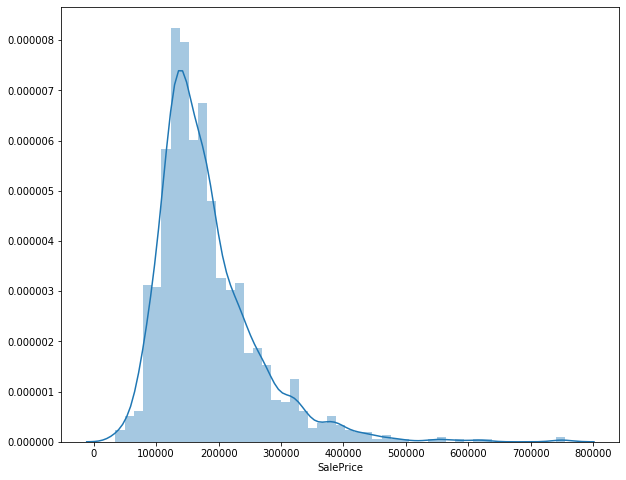

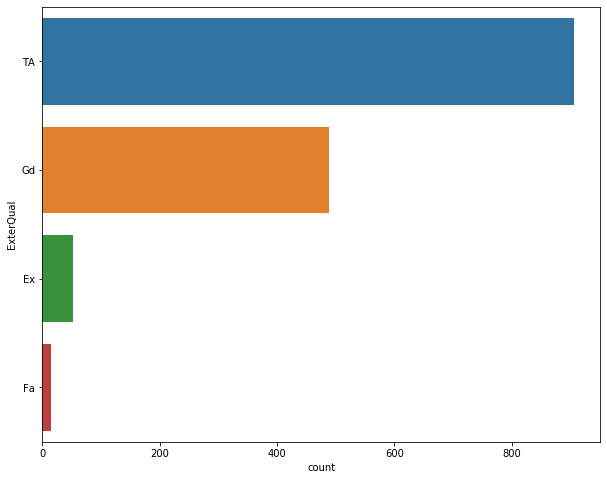

In [7]:
plt.figure(figsize=(10, 8))
sns.distplot(df['SalePrice'])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(y=df['ExterQual'], order=df['ExterQual'].value_counts().index)
plt.show()

Некоторые распределения выглядят не очень (например SalesPrice) - похоже на логарифмы. Если взять логарифм, возможно, будет лучше. В принципе, некоторым алгоритмам легче работать когда у нас везде нормальное распределение

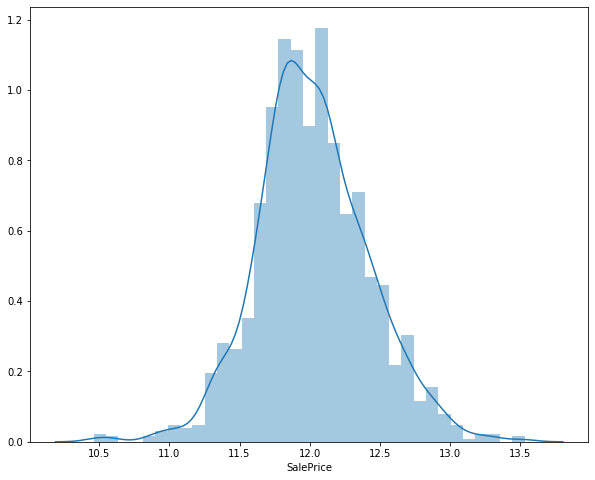

In [8]:
plt.figure(figsize=(10, 8))
sns.distplot(df['SalePrice'].apply(np.log))
plt.show()


Можно посмотреть на карту корреляций, но она очень большая, лучше отдельно как-то

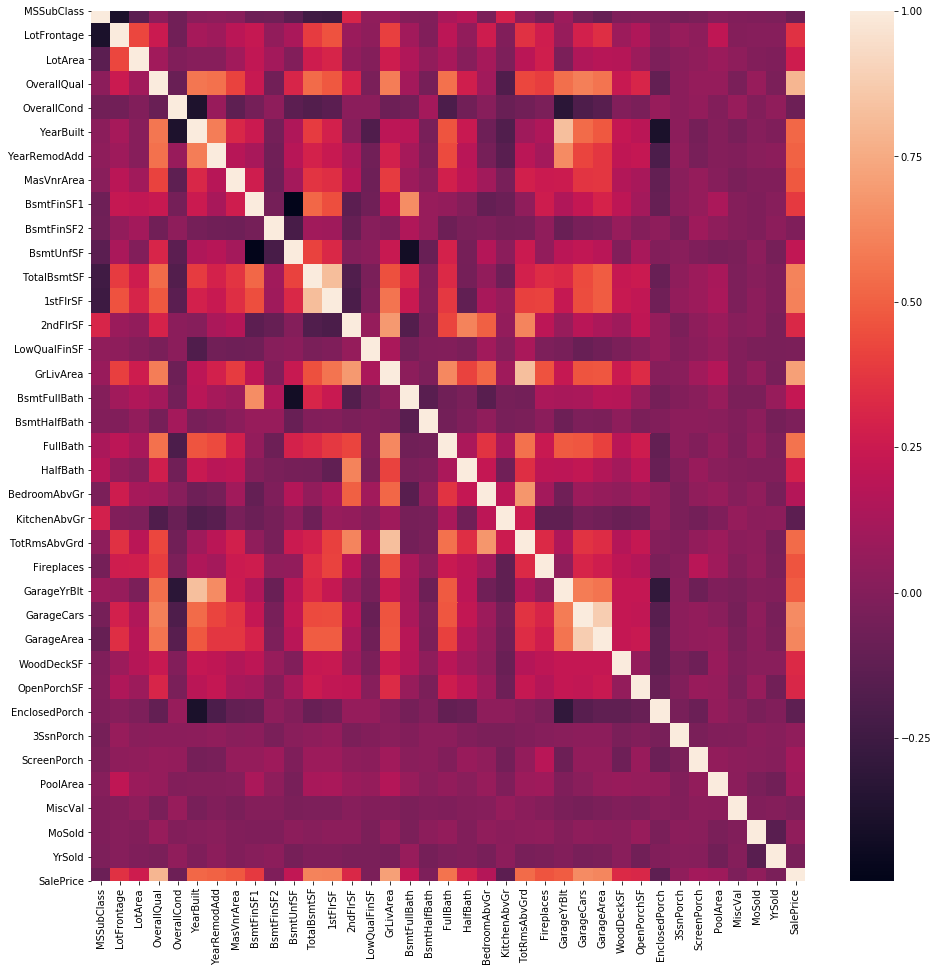

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

In [1]:
df.corr()['SalePrice'].sort_values(ascending=False)

NameError: name 'df' is not defined

Дальше на скаттер-плоты и бокс-плоты. Видим, что некоторые столбцы, хоть и числовые, но на самом деле скорее категориальные

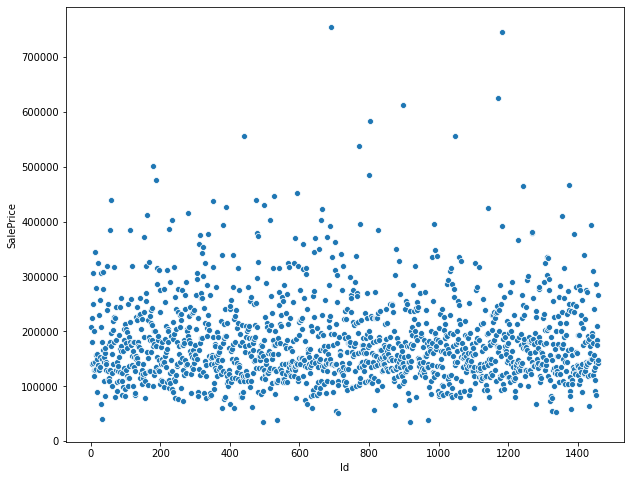

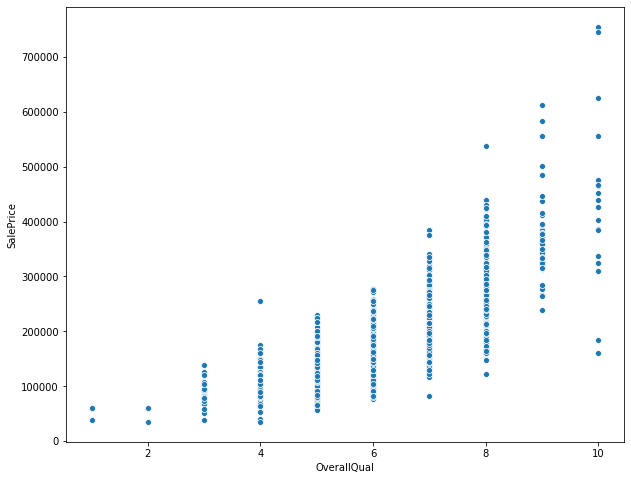

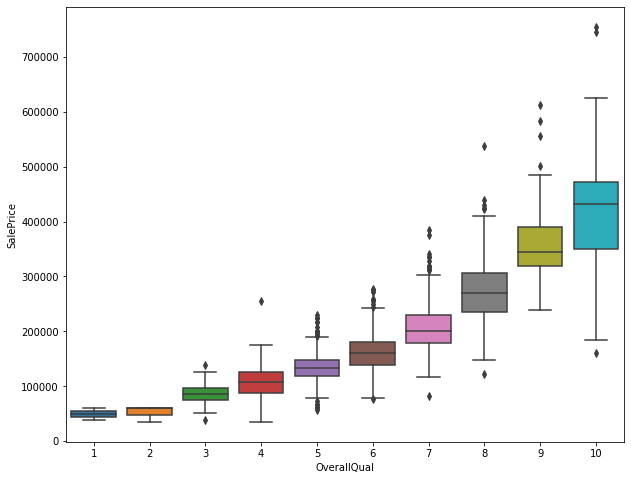

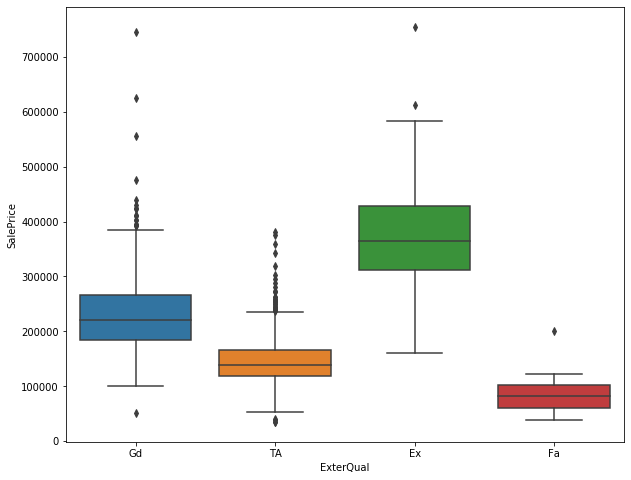

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.index, y=df['SalePrice'])
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.OverallQual, y=df['SalePrice'])
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x=df.OverallQual, y=df['SalePrice'])
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x=df['ExterQual'], y=df['SalePrice'])
plt.show()

Исходя из анализа описания столбцов, значения некоторых категориальных полей имеют явный порядок. Например, Ex - Gd - TA - Fa. Это вроде оценок по пятибалльной шкале

Pairplot лучше не строить - либо посмотреть его для отдельно взяты столбцов, ибо их очень много

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


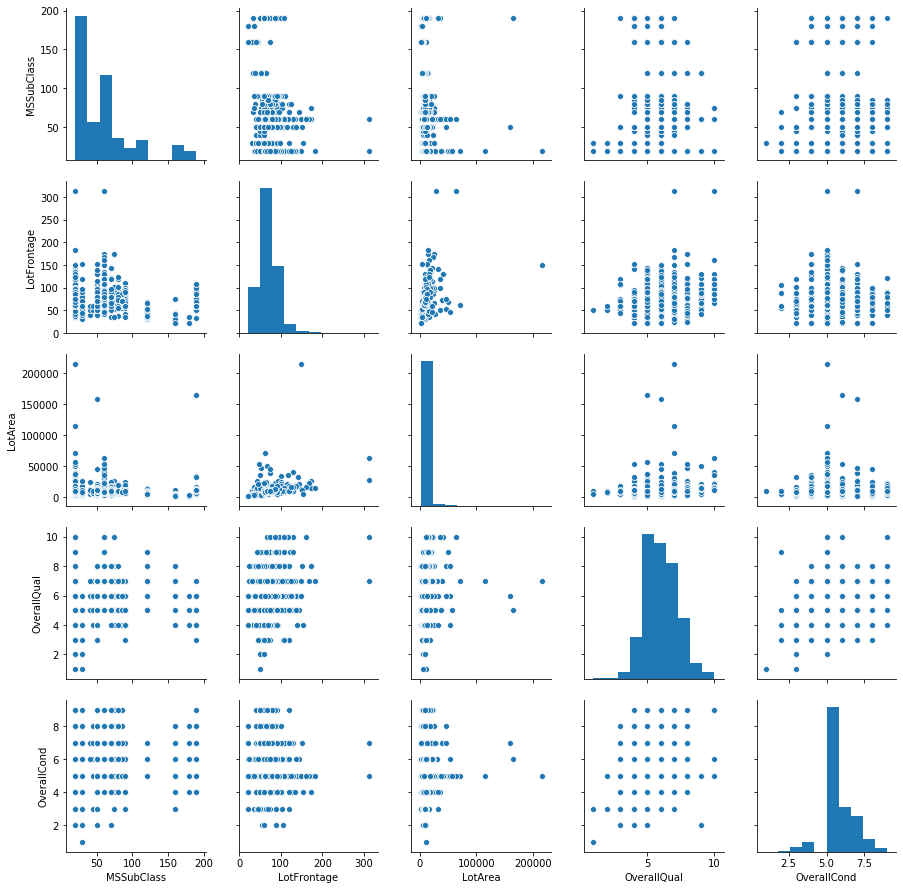

In [12]:
sns.pairplot(df.loc[:,df.dtypes[df.dtypes != 'object'].index[:5]])

# Pipeline
Отбираем самые полезные на наш взгляд стоблцы, которые лучше всего говорят про цену, убираем столбцы где мало данных, где низкая вариация

Определяем, как будем заполнять пропущенные значения в некоторых столбцах

Определяем преобразования над столбцами. То есть, какие-то будем преобразовывать по формулам (применять логарифм), какие-то - давать лейбл, где-то у нас есть порядок, где-то будем применять One Hot Encoding и т.п. 

Параметры преобразований должны быть определены на обучающей выборке и использованы на тестовой без изменений, поэтому их тоже надо добавить как этапы нашего алгоритма

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, MissingIndicator

from sklearn.preprocessing import Binarizer, LabelEncoder, OrdinalEncoder, FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression

**Pipeline**

Позволяет собирать несколько шагов алгоритма в один. Такая коробочка, куда можно положить несколько элементов (например, заполнить пробелы + преобразовать + применить алгоритм), но с точки зрения того, кто будет ее использовать - это один элемент, просто как алгоритм

**Imputation**

Вычисление пропущенных значений
- MissingIndicator - добавляет индикатор (столбец) что значение пропущено
- SimpleImputer - заменяет пропущенные значения на константу / среднее
- IterativeImputer - вычисляет значения пропущенных значений в числовых столбцах как регрессию от других столбцов, итеративно друг за другом. Чуть точнее чем просто замена средним

**Preprocessing**

Преобразование столбцов в удобный для машины вид
- Binarizer - бинаризация по порогу (меньше / больше)
- LabelEncoder - преобразование категориальных значений в числа в рамках одного столбца
- OrdinalEncoder - преобразование категориальных значений в числа в рамках одного столбца, но там есть порядок, то есть (лучше-средне-плохо) и т.п.
- FunctionTransformer - применение функции к столбцу (логарифм и т.п.)
- OneHotEncoder - Раскрытие столбца в набор бинаризованных столбцов [Пример](https://www.google.com/search?q=one+hot+encoding&client=firefox-b-d&sxsrf=ACYBGNTuWp9GbRvaLf1G9tt15mgQR3PxRw:1575888112191&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiR5ofZsKjmAhUr6KYKHRGiBMAQ_AUoAXoECA0QAw&biw=1217&bih=647#imgrc=o183h19wS1mB8M:)
- StandardScaler - Преобразование числовых столбцов: стандартизация, матожидание в 0, дисперсия 1
- MinMaxScaler - Преобразование числовых столбцов: нормализация, от 0 до 1 (можно настроить)

**Compose**

- ColumnTransformer - преобразования (imputation / transformation) для каждого столбца отдельно)
- TransformedTargetRegressor - преобразование целевой переменной регрессии. Иногда это хорошо, т.к. предсказывать стандартизованную переменную бывает проще, чем ее экспоненту (в нашем случае мы видели, что логарифм цены распределен примерно нормально)

In [14]:
# Отбираем колонки

# Числовые
numeric_columns = df.dtypes[df.dtypes.apply(lambda x: x in ['int64', 'float64'])].index

# Качество
quality_categories = ['_NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
quality_columns = ['PoolQC', 'BsmtQual', 'ExterQual', 'KitchenQual', 'BsmtCond', 
                   'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 'ExterCond']

# И так далее по всем типам и преобразованиям


In [15]:
column_transformer = ColumnTransformer(
        [
#             преобразуем числовые колонки - сначала постепенно выводим неизвестные значения в столбцах, затем 
#             все стандартизируем. У нас два шага, поэтому собираем их воедина через make_pipeline. Применяем только
#             к числовым колонкам numeric_columns и даем название этому шагу 'numeric_cols'
#             Дальше проделываем все то же самое с остальными колонками
            ('numeric_cols', make_pipeline(
                IterativeImputer(LinearRegression(), n_nearest_features=10, initial_strategy='median'),
                StandardScaler()
            ), 
             numeric_columns),
            ('ohe', make_pipeline(
                SimpleImputer(strategy='constant', fill_value='_NA'),
                OneHotEncoder(handle_unknown='ignore')
            ), 'КОЛОНКИ КОТОРЫЕ КОДИРУЮТСЯ ЧЕРЕЗ ONE HOT'),
#             тут кодируем качество. Обращаем внимание, что категории должны задаваться для каждого столбца отдельно, 
#             поэтому у нас [quality_categories]*len(quality_columns) (то есть мы один и тот же столбец повторяем)
#             нужное число раз
            ('quality', make_pipeline(
                SimpleImputer(strategy='constant', fill_value='_NA'),
                OrdinalEncoder(categories=[quality_categories]*len(quality_columns))
            ), quality_columns),
            ('', Binarizer(0.5), 'КОЛОНКИ КОТОРЫЕ БИНАРИЗИРУЕМ'),
            ('YesNo', LabelEncoder(), 'КОЛОНКИ СОДЕРЖАЩИЕ ТОЛЬКО ДВА ЗНАЧЕНИЯ ТИПА YES/NO'),
        ]
)

regressor = LinearRegression()

# Создаем новую цель - не цена, а логарифм от цены. Потом алгоритм сам преобразует обратно, т.к. мы дали обратную
# функцию
# Также: у нас 2 шага преобразования - сначала функция, затем стандартизация, поэтому используем make_pipeline
tt_regressor = TransformedTargetRegressor(
    regressor=regressor, 
    transformer=make_pipeline(
        FunctionTransformer(np.log, np.exp, validate=False),
        StandardScaler()
    )
)

# Второй способ создания Pipelines: через шаги и конструктор Pipeline. По сути то же самое
pipeline_steps = [
    ('transformers', column_transformer),
    ('regressor', tt_regressor)
]

pipeline = Pipeline(pipeline_steps)

Дальше мы будем обучать `fit` и тестировать `score` именно **pipeline**

Мы можем заменять значение **regressor** другим алгоритмом через название шага **__** следующий шаг **...** параметр

***'regressor__regressor': [DecisionTreeRegressor(), RandomForestRegressor()]***

***'regressor__regressor__max_depth': [3, 4, 5]***

[Пример1](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)
[Пример2](https://www.kaggle.com/evanmiller/pipelines-gridsearch-awesome-ml-pipelines)

PS: Можно добавить в итоговый pipeline шаг, связанный с отбором ключевых столбцов, чтобы уменьшить размерность, например, PCA

# Ансамбли

## Обзор, суть

[Раздел про ансамбли](https://vas3k.ru/blog/machine_learning/#scroll140)
                    
[Более подробно с кучей формул](http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf)

[Что такое стекинг / блендинг](https://dyakonov.org/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/)

[Что такое бустинг](https://alexanderdyakonov.files.wordpress.com/2017/06/book_boosting_pdf.pdf)


## sklearn, xgboost, lightgbm, catboost

[Глубокая статья про сравнение, с экспериментами, примерами кода и выводами](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db)

Если используется анаконда, то там это должно быть. Если нет - можно установить через менеджер пакетов conda. 

Если чистый Python - надо чуть заморочиться

## Ансамбли в самом sklearn

Есть мета-модели, реализующие данные подходы. Описание с примерами кода (они простые, по сути, как pipelines):
- [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html?highlight=bagging#sklearn.ensemble.BaggingRegressor)
- [Stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html?highlight=stacking#sklearn.ensemble.StackingRegressor)
- [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=boosting#sklearn.ensemble.GradientBoostingRegressor)

# Некоторые эксперименты

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df.SalePrice, random_state=98987)

Просто линейная регрессия со всеми преобразованиями

In [17]:
column_transformer = ColumnTransformer(
        [
            ('numeric_cols', make_pipeline(
                IterativeImputer(LinearRegression(), n_nearest_features=10, initial_strategy='median'),
                StandardScaler()
            ), numeric_columns[:-1]),
            ('quality', make_pipeline(
                SimpleImputer(strategy='constant', fill_value='_NA'),
                OrdinalEncoder(categories=[quality_categories]*len(quality_columns))
            ), quality_columns)
        ]
)

tt_regressor = TransformedTargetRegressor(
    regressor=LinearRegression(), 
    transformer=make_pipeline(
        FunctionTransformer(np.log, np.exp, validate=False),
        StandardScaler()
    )
)

pipeline_steps = [
    ('transformers', column_transformer),
    ('regressor', tt_regressor)
]

pipeline = Pipeline(pipeline_steps)

In [18]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6639094673060395

Теперь - грид-серч лучших параметров среди нескольких моделей, включая ансамблевые

XGBoost

In [19]:
import xgboost
from sklearn.ensemble import BaggingRegressor

In [20]:
params = [
    {
        'regressor__regressor': [LinearRegression(), 
                                 BaggingRegressor(base_estimator=LinearRegression(), n_estimators=2, random_state=0)],
    },
    {
        'regressor__regressor': [xgboost.XGBRegressor()],
        'regressor__regressor__n_estimators': [50, 100, 150],
        'regressor__regressor__max_depth': [3, 4, 5],
    },
]

gsc = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='r2', 
        verbose=0, 
        n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

print('Best params:', grid_result.best_params_)
print('Best score:', grid_result.best_score_)

[22:37:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best params: {'regressor__regressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1), 'regressor__regressor__max_depth': 5, 'regressor__regressor__n_estimators': 100}
Best score: 0.8693289254663303


In [21]:
estimator = grid_result.best_estimator_
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

[22:37:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8159878502285621

In [22]:
import catboost

In [23]:
 #бесконечный поиск
    
# params = [
#     {
#         'regressor__regressor': [LinearRegression(), 
#                                  BaggingRegressor(base_estimator=LinearRegression(), n_estimators=2, random_state=0)],
#     },
#     {
#         'regressor__regressor': [catboost.CatBoostRegressor()],
#         'regressor__regressor__depth': [4,7,10],
#         'regressor__regressor__learning_rate' : [0.03,0.1,0.15],
#         'regressor__regressor__l2_leaf_reg': [1,4,9]
#     },
# ]

# gsc = GridSearchCV(
#         estimator=pipeline,
#         param_grid=params,
#         cv=5,
#         scoring='r2', 
#         verbose=0, 
#         n_jobs=-1)

# grid_result = gsc.fit(X_train, y_train)

# print('Best params:', grid_result.best_params_)
# print('Best score:', grid_result.best_score_)

In [24]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
655,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
302,60,RL,66.0,16226,Pave,NaN,IR3,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
1384,30,RL,NaN,25339,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
181,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [25]:
#catboost не работает со строками
# model = catboost.CatBoostRegressor(iterations=2,
#                           learning_rate=1,
#                           depth=2)
# model.fit(X_train,y_train)


In [26]:
import lightgbm

In [27]:
params = [
    {
        'regressor__regressor': [LinearRegression(), 
                                 BaggingRegressor(base_estimator=LinearRegression(), n_estimators=2, random_state=0)],
    },
    {
        'regressor__regressor': [lightgbm.LGBMRegressor()],
        'regressor__regressor__n_estimators': [200],
        'regressor__regressor__max_depth': [25,50, 75],
        'regressor__regressor__learning_rate' : [0.03,0.1,0.15],
        'regressor__regressor__num_leaves' : [300,900,1200],
    },
]

gsc = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='r2', 
        verbose=0, 
        n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

print('Best params:', grid_result.best_params_)
print('Best score:', grid_result.best_score_)

Best params: {'regressor__regressor': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=75,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'regressor__regressor__learning_rate': 0.03, 'regressor__regressor__max_depth': 75, 'regressor__regressor__n_estimators': 200, 'regressor__regressor__num_leaves': 300}
Best score: 0.8673518972025076


In [28]:
estimator = grid_result.best_estimator_
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

0.8217142814962994